In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike=pd.read_csv('C:\\Users\\gramakot\\OneDrive - UHG\\Upgrad\\Linear Regression\\Linera Regression Assignment\\day.csv')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**During Spring there is decrease in number of sharing bikes used**

,season,cnt
0,fall,5644.303191
1,spring,2608.411111
2,summer,4992.331522
3,winter,4728.162921


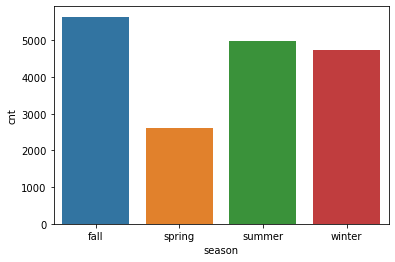

In [3]:
bike['season']=['spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter' if x==4 else 'Null' for x in list(bike['season']) ]
sns.barplot(data=bike[['season','cnt']].groupby('season').mean().reset_index(),x='season',y='cnt')
bike[['season','cnt']].groupby('season').mean().reset_index()

**As the time progress the usage of shared bikes gone up**

<AxesSubplot:xlabel='yr', ylabel='cnt'>

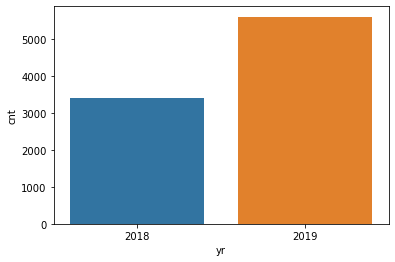

In [4]:
bike['yr']=['2018' if x==0 else '2019' if x==1 else 'Null' for x in list(bike['yr']) ]
sns.barplot(data=bike[['yr','cnt']].groupby('yr').mean().reset_index(),x='yr',y='cnt')

**There is slight decrease in number of bikes used on Tuesday, because of Holiday**

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

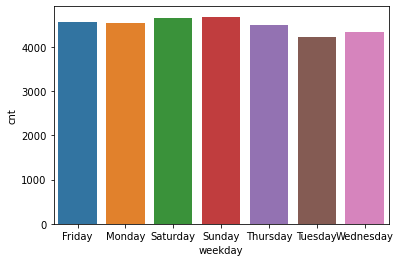

In [5]:
bike['weekday']=['Monday' if x==6 else 'Tuesday' if x==0 else 'Wednesday' if x==1 else 'Thursday' if x==2 else 'Friday' if x==3 else 'Saturday' if x==4 else 'Sunday' if x==5 else 'Null' for x in list(bike['weekday'])]
sns.barplot(data=bike[['weekday','cnt']].groupby('weekday').mean().reset_index(),x='weekday',y='cnt')

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64


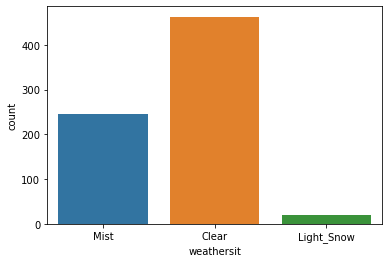

In [6]:
bike['weathersit']=['Clear' if x==1 else 'Mist' if x==2 else 'Light_Snow' if x==3 else 'Null' for x in list(bike['weathersit']) ]
sns.countplot(bike['weathersit'])
print(bike['weathersit'].value_counts())

**During Snow days people tend to not use bikes**

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

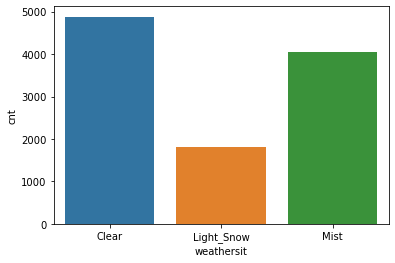

In [7]:
sns.barplot(data=bike[['weathersit','cnt']].groupby('weathersit').mean().reset_index(),x='weathersit',y='cnt')

**On Working days people are using bikes for commute to office**

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

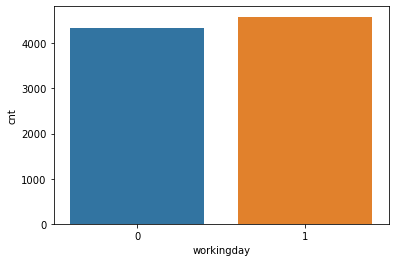

In [8]:
sns.barplot(data=bike[['workingday','cnt']].groupby('workingday').mean().reset_index(),x='workingday',y='cnt')

**On holidays overall usage of bike decrease, But during holiday number casual users gone up**

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

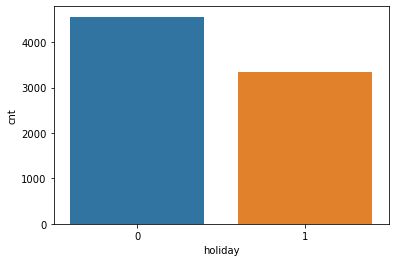

In [9]:
sns.barplot(data=bike[['holiday','cnt']].groupby('holiday').median().reset_index(),x='holiday',y='cnt')

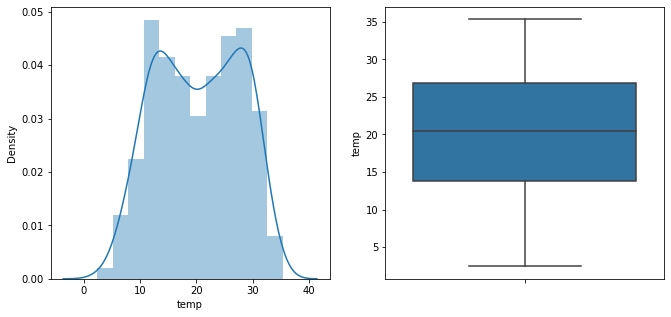

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


In [10]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(bike['temp'])
plt.subplot(1,2,2)
sns.boxplot(y=bike['temp'])
plt.show()
print(bike['temp'].describe())

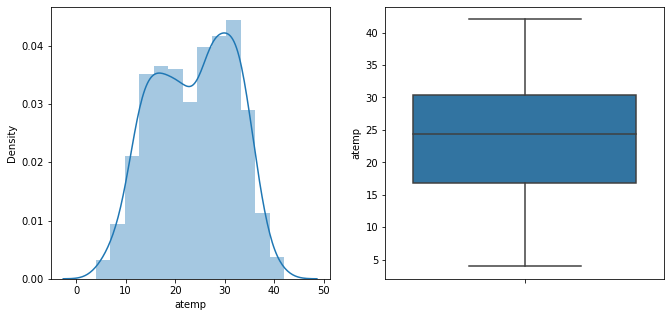

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


In [11]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(bike['atemp'])
plt.subplot(1,2,2)
sns.boxplot(y=bike['atemp'])
plt.show()
print(bike['atemp'].describe())

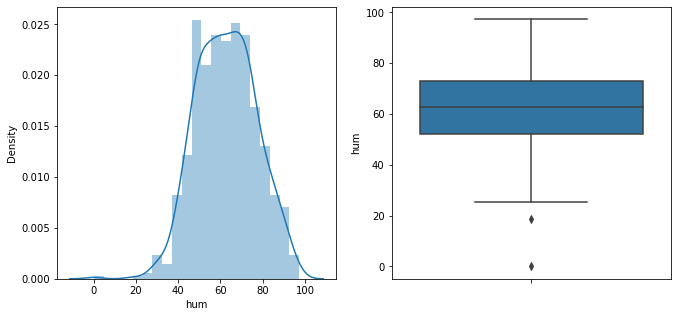

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


In [12]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(bike['hum'])
plt.subplot(1,2,2)
sns.boxplot(y=bike['hum'])
plt.show()
print(bike['hum'].describe())

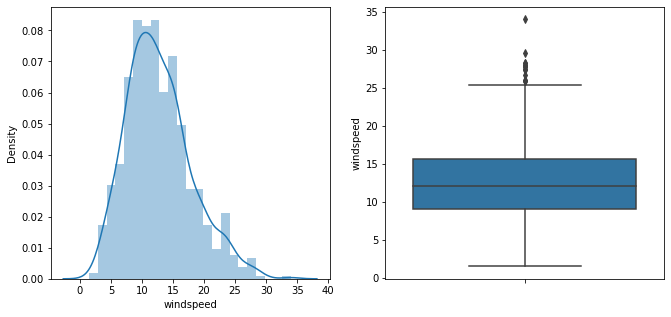

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


In [13]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(bike['windspeed'])
plt.subplot(1,2,2)
sns.boxplot(y=bike['windspeed'])
plt.show()
print(bike['windspeed'].describe())

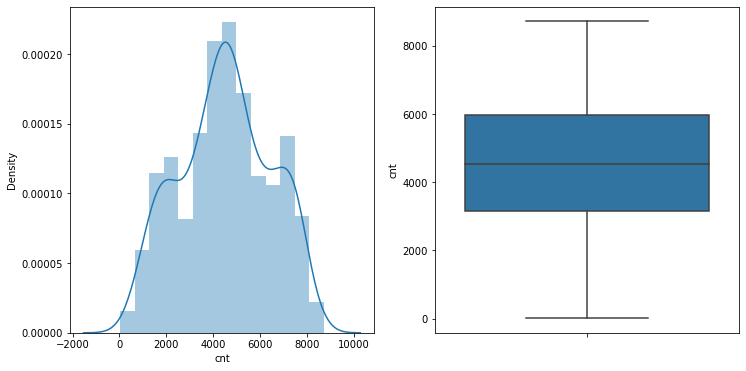

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bike['cnt'])
plt.subplot(1,2,2)
sns.boxplot(y=bike['cnt'])
plt.show()
print(bike['cnt'].describe())

**During holidays number of casual users goneup**

<AxesSubplot:xlabel='holiday', ylabel='value'>

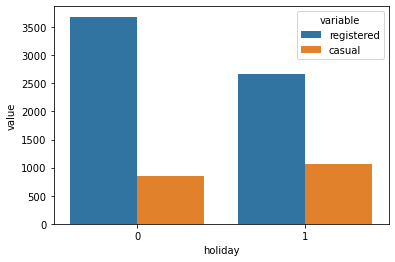

In [15]:
sns.barplot(data=pd.melt(bike[['registered','casual','holiday']].groupby('holiday').mean().reset_index(),id_vars='holiday',value_vars=['registered','casual']),x='holiday',y='value',hue='variable')

**Number of casual users goneup on Tuesday and Monday because of holiday**

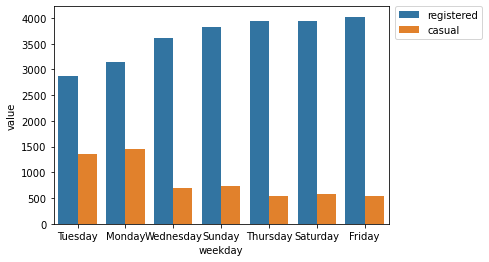

In [16]:
sns.barplot(data=pd.melt(bike[['registered','casual','weekday']].groupby('weekday').median().sort_values(by='registered').reset_index(),id_vars='weekday',value_vars=['registered','casual']),x='weekday',y='value',hue='variable')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

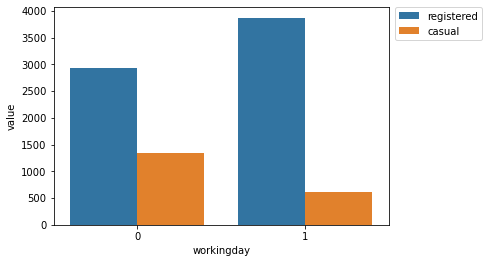

In [17]:
sns.barplot(data=pd.melt(bike[['registered','casual','workingday']].groupby('workingday').median().reset_index(),id_vars='workingday',value_vars=['registered','casual']),x='workingday',y='value',hue='variable')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Temperature and Number of users are correlated in a positive way**

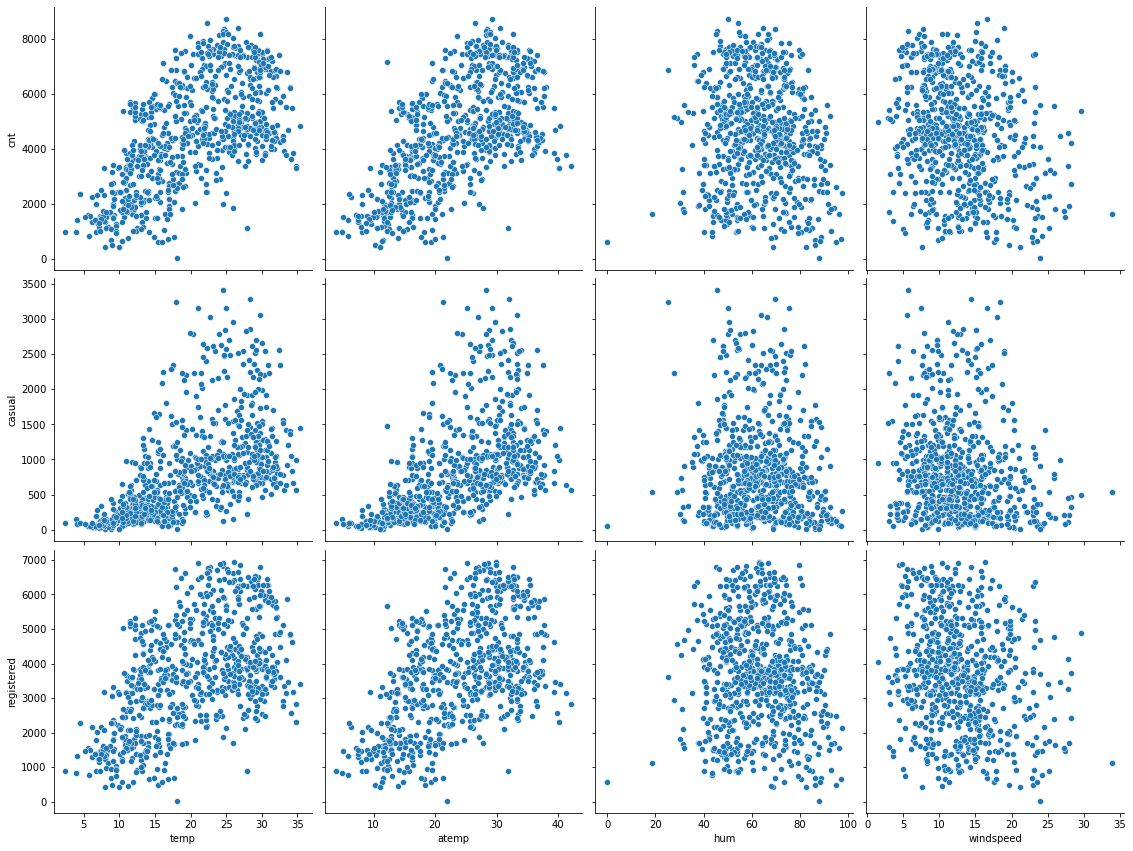

In [18]:
sns.pairplot(bike, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars=['cnt','casual','registered'],size=4, aspect=1, kind='scatter')

<AxesSubplot:>

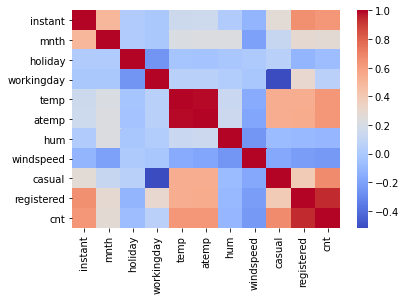

In [19]:
sns.heatmap(bike.corr(),cmap='coolwarm')

# Model Development

In [20]:
Unnecessary_Columns=['temp','casual','registered','instant','dteday']
bike.drop(Unnecessary_Columns,axis=1,inplace=True)

In [21]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
#bike['season']=['spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter' if x==4 else 'Null' for x in list(bike['season']) ]
#bike['yr']=['2018' if x==0 else '2019' if x==1 else 'Null' for x in list(bike['yr']) ]
#bike['weekday']=['Monday' if x==6 else 'Tuesday' if x==0 else 'Wednesday' if x==1 else 'Thursday' if x==2 else 'Friday' if x==3 else 'Saturday' if x==4 else 'Sunday' if x==5 else 'Null' for x in list(bike['weekday'])]
#bike['weathersit']=['Clear' if x==1 else 'Mist' if x==2 else 'Light_Snow' if x==3 else 'Null' for x in list(bike['weathersit']) ]

season=pd.get_dummies(bike['season'],drop_first=True)
yr=pd.get_dummies(bike['yr'],drop_first=True)
mnth=pd.get_dummies(bike['mnth'],drop_first=True)
weekday=pd.get_dummies(bike['weekday'],drop_first=True)
weathersit=pd.get_dummies(bike['weathersit'],drop_first=True)

In [23]:
bike_new=pd.concat([bike,yr,season,mnth,weekday,weathersit],axis=1)
bike_new.drop(['season','yr','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_new.head()

,holiday,workingday,atemp,hum,windspeed,cnt,2019,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,0,0,18.18125,80.5833,10.749882,985,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 18)
scaler = StandardScaler()
vars1=['atemp','hum','windspeed','cnt']
bike_train[vars1]=scaler.fit_transform(bike_train[vars1])
bike_test[vars1]=scaler.transform(bike_test[vars1])

In [46]:
X_train=bike_train.drop('cnt',axis=1)
y_train=bike_train['cnt']

In [47]:
X_train.columns

Index([   'holiday', 'workingday',      'atemp',        'hum',  'windspeed',
             '2019',     'spring',     'summer',     'winter',            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
           'Monday',   'Saturday',     'Sunday',   'Thursday',    'Tuesday',
        'Wednesday', 'Light_Snow',       'Mist'],
      dtype='object')

In [48]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=13)
selector=selector.fit(X_train,y_train)
X_train.columns[selector.support_]

Index([   'holiday',      'atemp',       '2019',     'spring',     'winter',
                  3,            4,            5,            6,            9,
                 10, 'Light_Snow',       'Mist'],
      dtype='object')

In [49]:
RFE_columns=list(X_train.columns[selector.support_])

In [67]:
X_train_RFE=X_train[RFE_columns]
X_train_sm=sm.add_constant(X_train_RFE)
model=sm.OLS(y_train,X_train_sm).fit()
print(model.summary())
y_prd=model.predict(sm.add_constant(bike_test[RFE_columns]))
print('R Square:'+str(r2_score(bike_test['cnt'],y_prd)))
print('Adjusted R Square:'+str(1 - (1-r2_score(bike_test['cnt'],y_prd)) * (len(bike_test['cnt'])-1)/(len(bike_test['cnt'])-X_train.shape[1]-1)))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.90e-171
Time:                        21:16:12   Log-Likelihood:                -295.19
No. Observations:                 510   AIC:                             618.4
Df Residuals:                     496   BIC:                             677.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4669      0.059     -7.906      0.0

In [72]:
print('Train Data R Square         :'+str(r2_score(y_train,model.predict(X_train_sm))))
print('Train Data Adjusted R Square:'+str((1 - (1-r2_score(y_train,model.predict(X_train_sm))) * (len(bike_train['cnt'])-1)/(len(bike_train['cnt'])-X_train.shape[1]-1))))
print('Test Data R Square          :'+str(r2_score(bike_test['cnt'],y_prd)))
print('Test Data Adjusted R Square :'+str(1 - (1-r2_score(bike_test['cnt'],y_prd)) * (len(bike_test['cnt'])-1)/(len(bike_test['cnt'])-X_train.shape[1]-1)))

Train Data R Square         :0.8136736380416132
Train Data Adjusted R Square:0.8028271970128505
Test Data R Square          :0.8433085407662507
Test Data Adjusted R Square :0.8202171678265403


In [69]:
1 - (1-r2_score(y_train,model.predict(X_train_sm))) * (len(bike_train['cnt'])-1)/(len(bike_train['cnt'])-X_train.shape[1]-1)

0.8028271970128505

In [76]:
vif=pd.DataFrame()
vif['Features']=X_train_RFE.columns
vif['VIF']=[variance_inflation_factor(X_train_RFE.values,i) for i in range(X_train_RFE.shape[1]) ]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,2.42
4,winter,2.36
1,atemp,2.15
2,2019,1.94
10,10,1.66
12,Mist,1.49
5,3,1.22
8,6,1.20
9,9,1.16
7,5,1.14


**LinearRegression**

In [56]:
lm=LinearRegression()
lm.fit(X_train[RFE_columns],y_train)
print('Train Data R Square:'+str(lm.score(X_train[RFE_columns],y_train)))
print('Test R Square:'+str(r2_score(bike_test['cnt'],lm.predict(bike_test[RFE_columns]))))
print('Test Adjusted R Square:'+str(1 - (1-r2_score(bike_test['cnt'],lm.predict(bike_test[RFE_columns]))) * (len(bike_test['cnt'])-1)/(len(bike_test['cnt'])-X_train.shape[1]-1)))

Train Data R Square:0.8136736380416132
Test R Square:0.843308540766251
Test Adjusted R Square:0.8202171678265405


## Residual Analysis

**Error terms are normally distributed**

Text(0.5, 0, 'Errors')

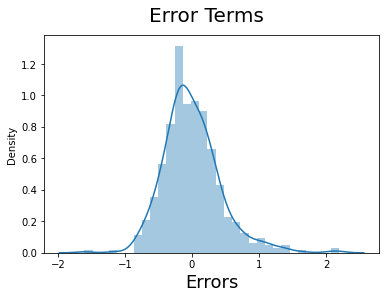

In [58]:
fig = plt.figure()
sns.distplot(lm.predict(X_train[RFE_columns])-y_train)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Error terms have almost constant variance**

Text(0.5, 0, 'Y Train')

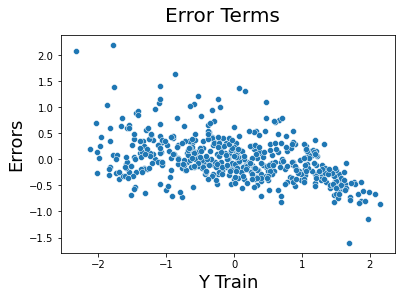

In [62]:
fig = plt.figure()
sns.scatterplot(y_train,lm.predict(X_train[RFE_columns])-y_train)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 18)                         # y-label
plt.xlabel('Y Train', fontsize = 18)

# Model Evaluation

Text(0.5, 0, 'Y_Actual')

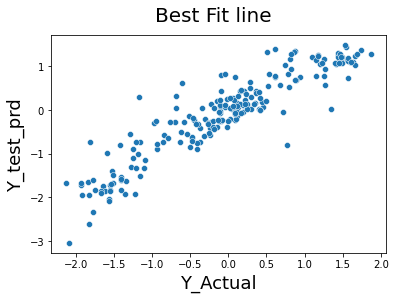

In [65]:
fig = plt.figure()
sns.scatterplot(bike_test['cnt'],lm.predict(bike_test[RFE_columns]))
fig.suptitle('Best Fit line', fontsize = 20)                  # Plot heading 
plt.ylabel('Y_test_prd', fontsize = 18)                         # y-label
plt.xlabel('Y_Actual', fontsize = 18)

In [66]:
print('Test R Square:'+str(r2_score(bike_test['cnt'],lm.predict(bike_test[RFE_columns]))))
print('Test Adjusted R Square:'+str(1 - (1-r2_score(bike_test['cnt'],lm.predict(bike_test[RFE_columns]))) * (len(bike_test['cnt'])-1)/(len(bike_test['cnt'])-X_train.shape[1]-1)))

Test R Square:0.843308540766251
Test Adjusted R Square:0.8202171678265405


In [75]:
coef=pd.DataFrame()
coef['Features']=RFE_columns
coef['Coefficients']=list(lm.coef_)
coef.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
2,2019,1.083979
1,atemp,0.416360
9,9,0.401292
10,10,0.298358
5,3,0.290906
7,5,0.274997
4,winter,0.244732
6,4,0.195379
8,6,0.162524
12,Mist,-0.333029


**Important features are Light_Snow(wather Sit), Year and Season**